# Jawaban UTS Deep Learning
## Nama : Jessica Priscilla Immanuel
## NIM  : 2702246163

## **Nomor 2 - Deep learning for AI-generated image prediction**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
student_id = "2702246163" # change this with your actual student id

import hashlib
student_id_hash = int(hashlib.md5(student_id.encode('utf-8')).hexdigest(), 16)

In [9]:
class_id = student_id_hash % 100

classes = {
    0: 'apple',
    1: 'aquarium_fish',
    2: 'baby',
    3: 'bear',
    4: 'beaver',
    5: 'bed',
    6: 'bee',
    7: 'beetle',
    8: 'bicycle',
    9: 'bottle',
    10: 'bowl',
    11: 'boy',
    12: 'bridge',
    13: 'bus',
    14: 'butterfly',
    15: 'camel',
    16: 'can',
    17: 'castle',
    18: 'caterpillar',
    19: 'cattle',
    20: 'chair',
    21: 'chimpanzee',
    22: 'clock',
    23: 'cloud',
    24: 'cockroach',
    25: 'couch',
    26: 'crab',
    27: 'crocodile',
    28: 'cup',
    29: 'dinosaur',
    30: 'dolphin',
    31: 'elephant',
    32: 'flatfish',
    33: 'forest',
    34: 'fox',
    35: 'girl',
    36: 'hamster',
    37: 'house',
    38: 'kangaroo',
    39: 'keyboard',
    40: 'lamp',
    41: 'lawn_mower',
    42: 'leopard',
    43: 'lion',
    44: 'lizard',
    45: 'lobster',
    46: 'man',
    47: 'maple_tree',
    48: 'motorcycle',
    49: 'mountain',
    50: 'mouse',
    51: 'mushroom',
    52: 'oak_tree',
    53: 'orange',
    54: 'orchid',
    55: 'otter',
    56: 'palm_tree',
    57: 'pear',
    58: 'pickup_truck',
    59: 'pine_tree',
    60: 'plain',
    61: 'plate',
    62: 'poppy',
    63: 'porcupine',
    64: 'possum',
    65: 'rabbit',
    66: 'raccoon',
    67: 'ray',
    68: 'road',
    69: 'rocket',
    70: 'rose',
    71: 'sea',
    72: 'seal',
    73: 'shark',
    74: 'shrew',
    75: 'skunk',
    76: 'skyscraper',
    77: 'snail',
    78: 'snake',
    79: 'spider',
    80: 'squirrel',
    81: 'streetcar',
    82: 'sunflower',
    83: 'sweet_pepper',
    84: 'table',
    85: 'tank',
    86: 'telephone',
    87: 'television',
    88: 'tiger',
    89: 'tractor',
    90: 'train',
    91: 'trout',
    92: 'tulip',
    93: 'turtle',
    94: 'wardrobe',
    95: 'whale',
    96: 'willow_tree',
    97: 'wolf',
    98: 'woman',
    99: 'worm',
}

class_str = classes[class_id]

In [10]:
print(f"Please use the following class: {class_str}")

Please use the following class: camel


In [12]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 10.4 MB/s eta 0:00:00


In [13]:
# import library
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import shutil
import time
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import image_dataset_from_directory
from PIL import Image
from sklearn.utils import shuffle
import keras_tuner as kt
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [14]:
drive_file_path = '/content/drive/My Drive/Semester 5/UTS Deep Learning/data2/'

train_dir = os.path.join(drive_file_path, 'train')
test_dir = os.path.join(drive_file_path, 'test')

print(f"train_dir: {train_dir}")
print(f"test_dir: {test_dir}")

train_dir: /content/drive/My Drive/Semester 5/UTS Deep Learning/data2/train
test_dir: /content/drive/My Drive/Semester 5/UTS Deep Learning/data2/test


# Marsha

## **a) Construct and train a deep learning model as an image generator by using the images in your training dataset to train the model.**

In [ ]:
# input generator
LATENT_DIM = 100
IMG_SIZE = 64

# model generator DCGAN
def build_generator():
    model = keras.Sequential(name="Generator")

    # ubah vektor noise 1D menjadi fondasi 3D (4x4)
    model.add(layers.Dense(4 * 4 * 1024, input_shape=(LATENT_DIM,)))
    model.add(layers.Reshape((4, 4, 1024)))

    # pakai Conv2DTranspose untuk "upsampling", memperbesar gambar
    # blok Upsampling 1
    # dari 4x4 sampai 8x8
    model.add(layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # blok Upsampling 2
    # dari 8x8 sampai 16x16
    model.add(layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # blok Upsampling 3
    # dari 16x16 sampai 32x32
    model.add(layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # output Layer
    # dari 32x32 sampai 64x64
    model.add(layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same'))

    # tanh yg hasilnya -1 ato 1
    model.add(layers.Activation('tanh'))

    return model

generator = build_generator()
generator.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16384)          │     1,654,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 512)      │     8,389,120 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 256)    │     2,097,408 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 128)    │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 64, 64, 3)      │         6,147 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64, 64, 3)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,675,459 (48.35 MB)

 Trainable params: 12,673,667 (48.35 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
# discriminator
def build_discriminator():
    model = keras.Sequential(name="Discriminator")

    # inputnya 64x64x3
    # si img_size = 64
    model.add(layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)))

    # blok aownsampling 1
    # dari 64x64 jadi 32x32
    model.add(layers.Conv2D(64, kernel_size=4, strides=2, padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2)) # pake LeakyReLU

    # blok downsampling 2
    # dari 32x32 jadi 16x16
    model.add(layers.Conv2D(128, kernel_size=4, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    # blok downsampling 3
    # 16x16 jadi 8x8
    model.add(layers.Conv2D(256, kernel_size=4, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    # blok downsampling 4
    # 8x8 jadi 4x4
    model.add(layers.Conv2D(512, kernel_size=4, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    # output layer yang jadi klasifikasi
    # 3 dimensi jadi 1 dimensi
    model.add(layers.Flatten())

    # tambah dropout biar ga overfitting
    model.add(layers.Dropout(0.4))

    model.add(layers.Dense(1))

    return model

discriminator = build_discriminator()
discriminator.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "Discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 512)      │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         8,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,768,321 (10.56 MB)

 Trainable params: 2,766,529 (10.55 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
BATCH_SIZE = 64

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir, labels=None, image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE, interpolation='nearest')

# normalisasi dari 0-255 ke -1 sampai 1)
def normalize(image):
    image = (tf.cast(image, tf.float32) - 127.5) / 127.5
    return image
train_dataset = train_dataset.map(normalize)

# pecah batch
train_dataset = train_dataset.unbatch()

train_dataset = train_dataset.cache().shuffle(1000).batch(BATCH_SIZE, drop_remainder=True).prefetch(buffer_size=tf.data.AUTOTUNE)

print(next(iter(train_dataset)).shape)

Found 500 files.
(64, 64, 64, 3)


In [ ]:
@tf.function
def train_step(real_images):
    # noise acak
    noise = tf.random.normal([BATCH_SIZE, LATENT_DIM])

    # training discriminator
    with tf.GradientTape() as disc_tape:
        # generate fake image
        generated_images = generator(noise, training=True)

        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(generated_images, training=True)

        # loss discriminator
        real_loss = cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
        # koss total, ditambah aja
        disc_loss = real_loss + fake_loss

    # gradient n weight
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    d_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    # training generator
    with tf.GradientTape() as gen_tape:
        generated_images = generator(noise, training=True)
        fake_output = discriminator(generated_images, training=True)

        # loss
        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)

    # gradient n weight
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    g_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

    return disc_loss, gen_loss

In [ ]:
EPOCHS = 25
# save gambarnya baut cek progress tiap 5 epochs, jd keliatan dri blur bgt ke lumayan
SAVE_EVERY_N_EPOCHS = 5

seed = tf.random.normal([16, LATENT_DIM])
cross_entropy = losses.BinaryCrossentropy(from_logits=True)

g_optimizer = optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
d_optimizer = optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

generator_losses = []
discriminator_losses = []

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        # [-1, 1] ke [0, 1]
        plt.imshow((predictions[i] + 1) / 2.0)
        plt.axis('off')
    # save gambarnya
    plt.savefig(f'image_at_epoch_{epoch:04d}.png')
    plt.close(fig)

for epoch in range(EPOCHS):
    start_time = time.time()

    total_gen_loss = 0
    total_disc_loss = 0
    num_batches = 0

    for image_batch in train_dataset:
        disc_loss, gen_loss = train_step(image_batch)
        total_gen_loss += gen_loss
        total_disc_loss += disc_loss
        num_batches += 1

    # average loss nya
    avg_gen_loss = total_gen_loss / num_batches
    avg_disc_loss = total_disc_loss / num_batches

    generator_losses.append(avg_gen_loss)
    discriminator_losses.append(avg_disc_loss)

    print(f'Epoch {epoch + 1}/{EPOCHS} - time: {time.time() - start_time:.2f} sec')
    print(f'  Avg Generator Loss: {avg_gen_loss:.4f} | Avg Discriminator Loss: {avg_disc_loss:.4f}')

    if (epoch + 1) % SAVE_EVERY_N_EPOCHS == 0:
        generate_and_save_images(generator, epoch + 1, seed)
        print("========================================================")
        print(f'Gambar disimpan di image_at_epoch_{epoch + 1:04d}.png')
        print("========================================================")

print("Training Selesai!")

# --- Simpan Model Generator (untuk Tugas 2c) ---
generator.save('camel_generator_model.h5')
print("Model Generator disimpan pada 'camel_generator_model.h5'")

Epoch 1/25 - time: 99.21 sec
  Avg Generator Loss: 3.2029 | Avg Discriminator Loss: 0.8546
Epoch 2/25 - time: 82.36 sec
  Avg Generator Loss: 3.9419 | Avg Discriminator Loss: 1.0137
Epoch 3/25 - time: 80.51 sec
  Avg Generator Loss: 3.5899 | Avg Discriminator Loss: 0.9958
Epoch 4/25 - time: 79.89 sec
  Avg Generator Loss: 3.3381 | Avg Discriminator Loss: 1.0774
Epoch 5/25 - time: 81.91 sec
  Avg Generator Loss: 3.0940 | Avg Discriminator Loss: 1.2250
Gambar disimpan di image_at_epoch_0005.png
Epoch 6/25 - time: 78.05 sec
  Avg Generator Loss: 2.5720 | Avg Discriminator Loss: 0.9424
Epoch 7/25 - time: 79.20 sec
  Avg Generator Loss: 3.0225 | Avg Discriminator Loss: 1.0593
Epoch 8/25 - time: 77.97 sec
  Avg Generator Loss: 2.8096 | Avg Discriminator Loss: 0.8524
Epoch 9/25 - time: 79.15 sec
  Avg Generator Loss: 2.7463 | Avg Discriminator Loss: 0.8697
Epoch 10/25 - time: 78.76 sec
  Avg Generator Loss: 2.6759 | Avg Discriminator Loss: 0.9451
Gambar disimpan di image_at_epoch_0010.png
Epo

Gambar disimpan di image_at_epoch_0025.png
Training Selesai!
Model Generator disimpan pada 'camel_generator_model.h5'


## **b) Plot the training and validation losses over epochs, analyze, and explain what happened in the generative training based on the plot.**

In [ ]:
# loss
print(f'Generator Losses: {generator_losses}')
print(f'Discriminator Losses: {discriminator_losses}')

Generator Losses: [<tf.Tensor: shape=(), dtype=float32, numpy=3.202888250350952>, <tf.Tensor: shape=(), dtype=float32, numpy=3.9418513774871826>, <tf.Tensor: shape=(), dtype=float32, numpy=3.5898730754852295>, <tf.Tensor: shape=(), dtype=float32, numpy=3.3380672931671143>, <tf.Tensor: shape=(), dtype=float32, numpy=3.0939793586730957>, <tf.Tensor: shape=(), dtype=float32, numpy=2.571974039077759>, <tf.Tensor: shape=(), dtype=float32, numpy=3.0225274562835693>, <tf.Tensor: shape=(), dtype=float32, numpy=2.8096001148223877>, <tf.Tensor: shape=(), dtype=float32, numpy=2.746344804763794>, <tf.Tensor: shape=(), dtype=float32, numpy=2.6759448051452637>, <tf.Tensor: shape=(), dtype=float32, numpy=2.925300121307373>, <tf.Tensor: shape=(), dtype=float32, numpy=3.0346810817718506>, <tf.Tensor: shape=(), dtype=float32, numpy=2.851897954940796>, <tf.Tensor: shape=(), dtype=float32, numpy=2.751638650894165>, <tf.Tensor: shape=(), dtype=float32, numpy=3.0112545490264893>, <tf.Tensor: shape=(), dtype

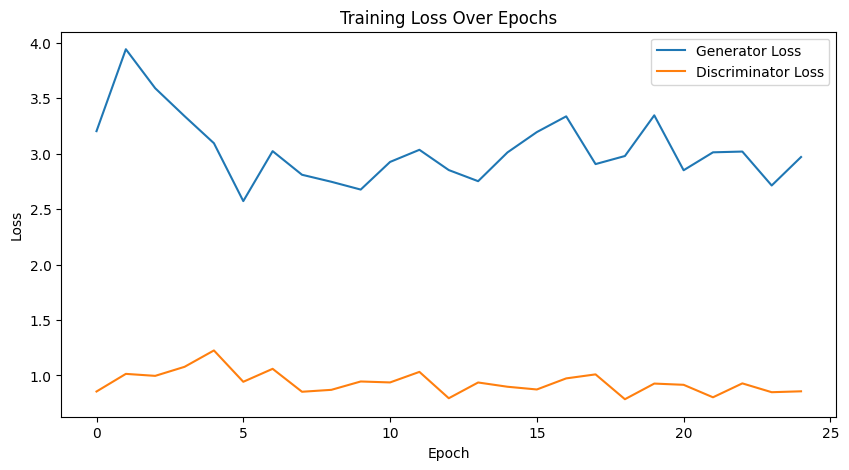

In [ ]:
# plotting
plt.figure(figsize=(10, 5))
plt.plot(generator_losses, label="Generator Loss")
plt.plot(discriminator_losses, label="Discriminator Loss")
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


Discriminator loss berada dibawah dengan nilai rendah dan stabil. Nilainya tidak tiba-tibua turun atau naik yang membuat discriminator dikatakan stabil. Sehingga masih memiliki performa yang baik

Generator loss memiliki nilai yang tinggi karena berusaha mengimbangi discriminator, dimana hal ini normal sehingga membuat grafik agak naik turun.

Dapat dilihat bahwa modelnya tidak collapse dan masih stabil karena tidak naik turun secara drastis.

## **c) Generate 500 images by using the trained model from point a.**

In [15]:
# load generator yg udh di train
model_path = '/content/drive/My Drive/Semester 5/UTS Deep Learning/camel_generator_model.h5'
generator = load_model(model_path)

In [16]:
LATENT_DIM = 100

OUTPUT_DIR = "point_c_generated_500_images"
os.makedirs(OUTPUT_DIR, exist_ok=True)

num_images = 500
for i in range(num_images):
    noise = tf.random.normal([1, LATENT_DIM])
    generated_image = generator(noise, training=False)

    # dari [-1, 1] ke  [0, 1]
    img = (generated_image[0] + 1.0) / 2.0
    img = img.numpy()

    # save 500 gambar
    plt.figure(figsize=(2,2))
    plt.imshow(img)
    plt.axis("off")
    plt.savefig(f"{OUTPUT_DIR}/image_generated{i:04d}.png")
    plt.close()

In [17]:
# path ke gambar yg baru di generate
print(f"Generated {num_images} images in folder '{OUTPUT_DIR}'")

Generated 500 images in folder 'point_c_generated_500_images'


## **d) Compare 10 generated images and 10 original images, analyze and explain the comparison.**

In [ ]:
# ambil 10 gambar yang asli dari train dir
class_str = 'camel'
REAL_DIR = os.path.join(train_dir, class_str)
real_files = sorted(os.listdir(REAL_DIR))[:10]

real_images = []
for fname in real_files:
    img = plt.imread(os.path.join(REAL_DIR, fname))
    real_images.append(img)

# generate 10 gambar
noise = tf.random.normal([10, LATENT_DIM])
gen_images = generator(noise, training=False)
# scale ke [0–1]
gen_images = (gen_images + 1) / 2.0
gen_images = gen_images.numpy()

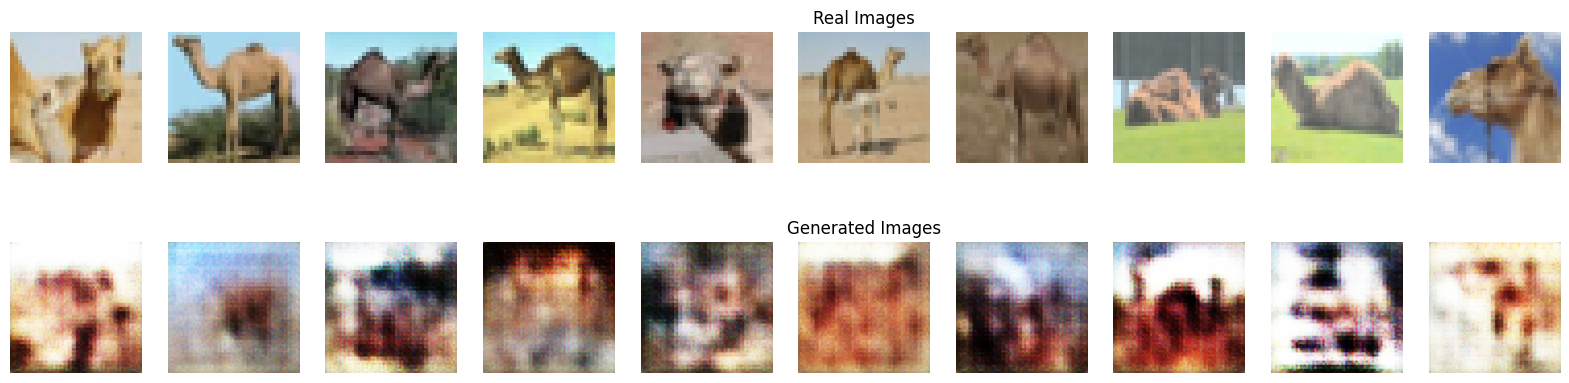

In [ ]:
# plotting
plt.figure(figsize=(20, 5))
for i in range(10):
    # ini buat yg gambar real
    plt.subplot(2, 10, i+1)
    plt.imshow(real_images[i])
    plt.axis('off')
    if i == 5:plt.title("Real Images")

    # ini buat yg gambar fake/generate
    plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(gen_images[i])
    plt.axis('off')
    if i == 5:plt.title("Generated Images")

plt.show()

Gambar yang di generate cenderung lebih blur karena model hanya belajar sebentar, yaitu 25 epochs. Akan lebih baik kalau model bisa belajar sampai ratusan epochs untuk menghasilkan gambar yang lebih mirip dengan aslinya. Namun dikarenakan keterbatasan laptop yang saya gunakan (tidak bisa berlama-lama run), maka saya gunakan epochs yang lebih sederhana.

Namun dapat terlihat dari hasil yang ada, bahwa gambar yang dihasilkan sudah mirip dengan gambar aslinya, model mengenali camel secara jelas dan bisa generate yang sama persis. Hasil yang ada hanya kurang tajam dan fokus saja karena masih baru belajar sedikit. Gambar yang dihasilkan masih ada noise dari model nya sehingga tidak sehalus gambar aslinya. Tetapi dengan epochs yang lebih banyak, pasti gambar yang dihasilkan oleh model ini akan sangat mirip dengan yang aslinya.

## **e) Construct a new dataset for classification with 2 classes: original and fake. Use your original training dataset as the original class and the generated images from point b as the fake class.**

In [25]:
# folder yang hasilin gambar fake
GEN_FOLDER = "/content/point_c_generated_500_images"
OUTPUT_DIR = "real_vs_fake_dataset"
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "original"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "fake"), exist_ok=True)

# ambil real image
dataset = image_dataset_from_directory(train_dir, label_mode=None, image_size=(32, 32), batch_size=BATCH_SIZE, shuffle=True, color_mode='rgb')

# preproessing
def preprocess(image):
    image = tf.cast(image, tf.float32)
    return (image / 127.5) - 1.0

dataset = dataset.map(preprocess)

Found 500 files.


In [26]:
# ambil yg real images nya
real_images = []
count = 0
for batch_tensor in dataset:
    for image_in_batch in batch_tensor:
        if count >= 500:
            break
        real_images.append((image_in_batch.numpy() + 1.0) / 2.0)
        count += 1
    if count >= 500:
        break
x_train = real_images

# save dulu gabarnya
for i, img_array in enumerate(x_train):
    img_pil = Image.fromarray((img_array * 255).astype(np.uint8))
    img_pil.save(os.path.join(OUTPUT_DIR, "original", f"orig_{i:03d}.png"))

print(f"Saved {len(x_train)} original images.")

Saved 500 original images.


In [27]:
# ambil yg fake image
gen_files = sorted(os.listdir(GEN_FOLDER))
for i, fname in enumerate(gen_files[:500]):
    img = Image.open(os.path.join(GEN_FOLDER, fname))
    img.save(os.path.join(OUTPUT_DIR, "fake", f"fake_{i:03d}.png"))

print(f"Saved 500 fake images.")

Saved 500 fake images.


In [28]:
orig_paths = [os.path.join(OUTPUT_DIR, "original", f) for f in sorted(os.listdir(os.path.join(OUTPUT_DIR, "original")))]
fake_paths = [os.path.join(OUTPUT_DIR, "fake", f) for f in sorted(os.listdir(os.path.join(OUTPUT_DIR, "fake")))]

x = []
y = []

# real image, 0
for path in orig_paths:
    img = np.array(Image.open(path).resize((32,32)).convert('RGB'))
    x.append(img)
    y.append(0)

# fake image, 1
for path in fake_paths:
    img = np.array(Image.open(path).resize((32,32)).convert('RGB'))
    x.append(img)
    y.append(1)

x = np.array(x)
y = np.array(y)

x, y = shuffle(x, y, random_state=42)

print("Combined dataset shape:", x.shape)
print("Labels distribution:", np.unique(y, return_counts=True))

Combined dataset shape: (1000, 32, 32, 3)
Labels distribution: (array([0, 1]), array([500, 500]))


In [30]:
np.savez(os.path.join(OUTPUT_DIR, "real_vs_fake_dataset.npz"), X=x, y=y)
print(f"Dataset saved : {os.path.join(OUTPUT_DIR, 'real_vs_fake_dataset.npz')}")

Dataset saved : real_vs_fake_dataset/real_vs_fake_dataset.npz


In [33]:
import zipfile
import os
from google.colab import files

image_folder = '/content/real_vs_fake_dataset/original'

zip_path = '/content/real_vs_fake_dataset/original.zip'
with zipfile.ZipFile(zip_path, 'w') as zipf:
    for root, dirs, files in os.walk(image_folder):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
              file_path = os.path.join(root, file)
              zipf.write(file_path, os.path.basename(file_path))

print(f"ZIP file created: {zip_path}")

files.download(zip_path)

ZIP file created: /content/real_vs_fake_dataset/original.zip


AttributeError: 'list' object has no attribute 'download'

## **f) Construct and train a deep learning model to classify original versus fake images by using the dataset from point d.**

In [ ]:
# original, 0
# fake, 1
# load dataset original dan fake

DATASET_DIR = "/content/real_vs_fake_dataset"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=42
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 1000 files belonging to 2 classes.
Using 800 files for training.
Found 1000 files belonging to 2 classes.
Using 200 files for validation.
Classes: ['fake', 'original']


In [ ]:
# cnn
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(*IMG_SIZE, 3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')  # binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train
EPOCHS = 20

history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.6086 - loss: 0.8685 - val_accuracy: 0.9900 - val_loss: 0.1664
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 978ms/step - accuracy: 0.9680 - loss: 0.1486 - val_accuracy: 0.9500 - val_loss: 0.1028
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9704 - loss: 0.0702 - val_accuracy: 0.9950 - val_loss: 0.0196
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9970 - loss: 0.0086 - val_accuracy: 0.9950 - val_loss: 0.0191
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 969ms/step - accuracy: 0.9992 - loss: 0.0093 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 983ms/step - accuracy: 1.0000 - loss: 7.3667e-04 - val_accuracy: 1.0000 - val_loss: 9.4476e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 1.0000 - loss: 3.8676e-04 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 1.0000 - loss: 2.7565e-04 - val_acc

## **g) Plot the training and validation losses over epochs, analyze, and explain what happened in the classification training based on the plot.**

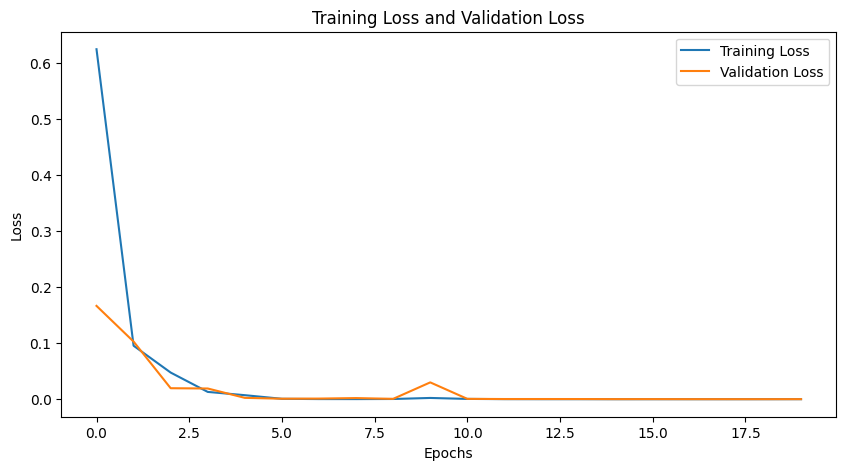

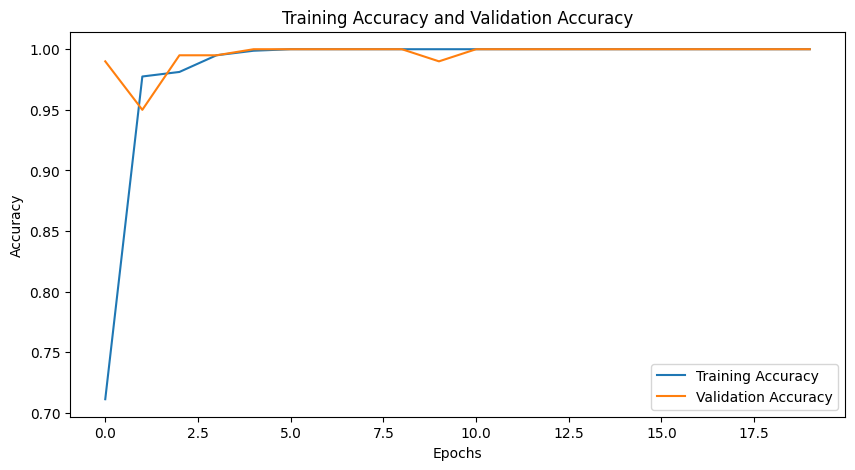

In [ ]:
# loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training Accuracy and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## **h) Do hyperparameter tuning to improve the deep learning model based on the result of point b and any other results you get from the training process.**

In [ ]:
# tuning
def build_model(hp):
    model = tf.keras.Sequential()

    # tuning CNN
    for i in range(hp.Int("num_blocks", 1, 3)):
        model.add(layers.Conv2D(
            filters=hp.Choice(f"filters_{i}", [32, 64, 128]),
            kernel_size=(3,3),
            activation="relu",
            padding="same"
        ))
        model.add(layers.MaxPooling2D())

    model.add(layers.Flatten())

    model.add(layers.Dense(
        hp.Choice("dense_units", [64, 128, 256]),
        activation='relu'
    ))

    model.add(layers.Dropout(hp.Float("dropout_rate", 0.0, 0.5, step=0.1)))

    model.add(layers.Dense(1, activation='sigmoid'))

    lr = hp.Choice("learning_rate", [1e-2, 5e-3, 1e-3, 5e-4, 1e-4])
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    return model

tuner = kt.Hyperband(build_model,objective='val_accuracy',max_epochs=20,factor=3,directory='tuner_results',project_name='fake_detector_tune')

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(train_ds,validation_data=val_ds,callbacks=[early_stop],epochs=20)

Trial 27 Complete [00h 36m 32s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 02h 50m 02s

Search: Running Trial #28

Value             |Best Value So Far |Hyperparameter
1                 |1                 |num_blocks
64                |32                |filters_0
64                |128               |dense_units
0.1               |0.4               |dropout_rate
0.0005            |0.0005            |learning_rate
64                |64                |filters_1
32                |128               |filters_2
20                |3                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
0                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5963 - loss: 2.0665 - val_accuracy: 0.9400 - val_loss: 0.1614
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 891ms/step - accuracy: 0.9533 - loss: 0.0995

KeyboardInterrupt: 

In [ ]:
best_hp = tuner.get_best_hyperparameters(1)[0]

print("----- Best Hyperparameters -----")
print("Blocks:", best_hp.get("num_blocks"))
for i in range(best_hp.get("num_blocks")):
    print(f"Filters Block {i}:", best_hp.get(f"filters_{i}"))
print("Dense units:", best_hp.get("dense_units"))
print("Dropout:", best_hp.get("dropout_rate"))
print("Learning Rate:", best_hp.get("learning_rate"))

----- Best Hyperparameters -----
Blocks: 1
Filters Block 0: 32
Dense units: 128
Dropout: 0.4
Learning Rate: 0.0005


In [ ]:
# cari best model
best_model = tuner.hypermodel.build(best_hp)

history_best = best_model.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=[early_stop])


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 729ms/step - accuracy: 0.5810 - loss: 3.9528 - val_accuracy: 0.9300 - val_loss: 0.2171
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 752ms/step - accuracy: 0.9141 - loss: 0.2465 - val_accuracy: 0.9650 - val_loss: 0.0873
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 677ms/step - accuracy: 0.9756 - loss: 0.0683 - val_accuracy: 0.9500 - val_loss: 0.0929
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 692ms/step - accuracy: 0.9781 - loss: 0.0591 - val_accuracy: 0.9900 - val_loss: 0.0278
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 951ms/step - accuracy: 0.9928 - loss: 0.0226 - val_accuracy: 0.9950 - val_loss: 0.0179
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 693ms/step - accuracy: 0.9959 - loss: 0.0133 - val_accuracy: 0.9950 - val_loss: 0.0125
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 683ms/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 1.0000 - val_loss: 0.0200
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 694ms/step - accuracy: 0.9978 - loss: 0.0089 - val_accu

In [ ]:
val_loss, val_acc = best_model.evaluate(val_ds)
print("Validation Loss after tuning    :", val_loss)
print("Validation Accuracy after tuning:", val_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 1.0000 - loss: 9.7754e-04
Validation Loss after tuning    : 0.0008571027428843081
Validation Accuracy after tuning: 1.0


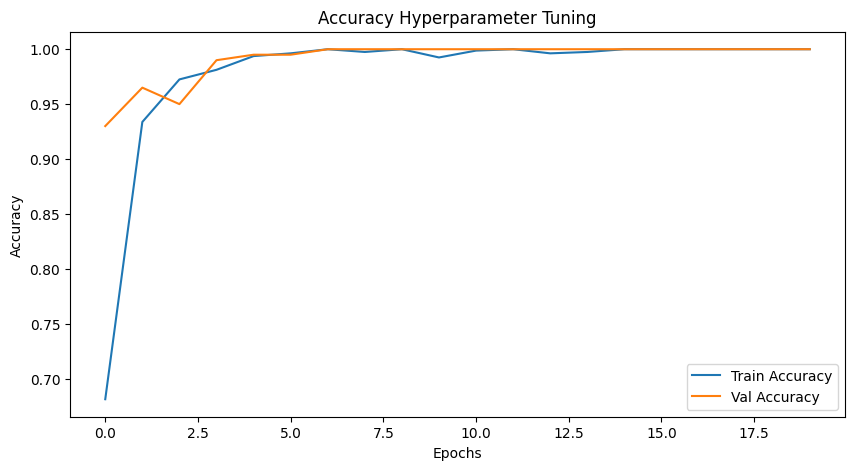

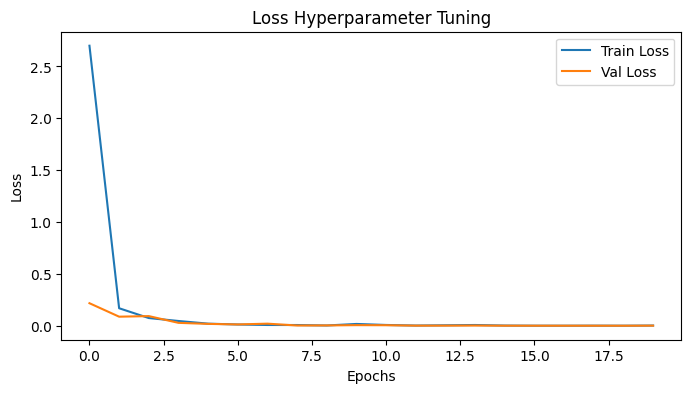

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history_best.history['accuracy'], label='Train Accuracy')
plt.plot(history_best.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Hyperparameter Tuning")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(history_best.history['loss'], label='Train Loss')
plt.plot(history_best.history['val_loss'], label='Val Loss')
plt.title("Loss Hyperparameter Tuning")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


## **i) Test the classification model on a separate test set with appropriate metrics.**

In [ ]:
IMAGE_SIZE = 128
BATCH_SIZE = 64

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)

normalization_layer = tf.keras.layers.Rescaling(1./255)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

y_true = []
y_pred = []

for images, labels in test_ds:
    preds = best_model.predict(images)
    preds = (preds > 0.5).astype("int32")

    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


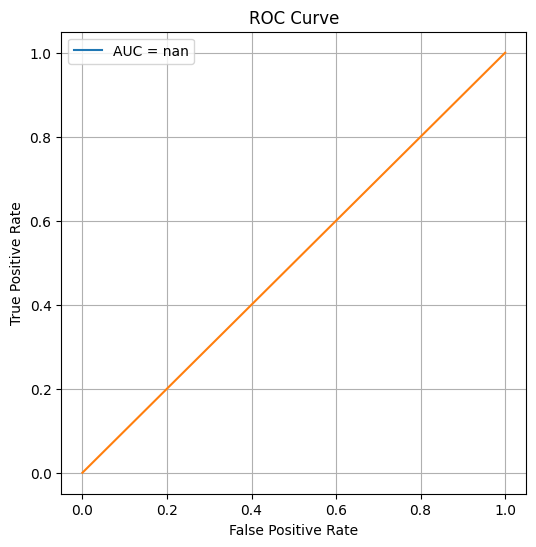

In [ ]:
y_pred_proba = []

for images, _ in test_ds:
    prob = best_model.predict(images)
    y_pred_proba.extend(prob.flatten())

fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


Accuracy yang dihasilkan oleh model memiliki nilai yang tinggi. Dari hasil

AUC yang dihasilkan juga mendekati 1 sehingga model sangat baik. Dari grafik yang ada bisa menghasilkan classifier yang baik. Jadi model sudah belajar dengan baik, namun tetap harus tambah epochs diawal biar bisa gambarnya gaburem.



---

